<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Description" data-toc-modified-id="Data-Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Description</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Correlation-heatmap" data-toc-modified-id="Correlation-heatmap-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Correlation heatmap</a></span></li><li><span><a href="#Histogram-of-all-features-for-small-dataset" data-toc-modified-id="Histogram-of-all-features-for-small-dataset-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Histogram of all features for small dataset</a></span></li><li><span><a href="#Univariate-Analysis" data-toc-modified-id="Univariate-Analysis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Univariate Analysis</a></span><ul class="toc-item"><li><span><a href="#Discrete-Variables" data-toc-modified-id="Discrete-Variables-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Discrete Variables</a></span></li><li><span><a href="#Continuous-variable" data-toc-modified-id="Continuous-variable-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Continuous variable</a></span></li></ul></li><li><span><a href="#Categorical-variables" data-toc-modified-id="Categorical-variables-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Categorical variables</a></span><ul class="toc-item"><li><span><a href="#waterfront" data-toc-modified-id="waterfront-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>waterfront</a></span></li><li><span><a href="#basement_bool" data-toc-modified-id="basement_bool-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>basement_bool</a></span></li><li><span><a href="#renovation_bool" data-toc-modified-id="renovation_bool-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>renovation_bool</a></span></li><li><span><a href="#box-plots-of-categorical-features" data-toc-modified-id="box-plots-of-categorical-features-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>box plots of categorical features</a></span></li></ul></li><li><span><a href="#Bi-variate-Analysis" data-toc-modified-id="Bi-variate-Analysis-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bi-variate Analysis</a></span></li><li><span><a href="#Multi-variate-Analysis" data-toc-modified-id="Multi-variate-Analysis-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Multi-variate Analysis</a></span></li></ul></div>

# Data Description

- Data source: https://www.kaggle.com/harlfoxem/housesalesprediction

This dataset contains house sale prices for King County, which includes Seattle.
It includes homes sold between May 2014 and May 2015.

![](../data/raw/data_description.png)

# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
!/Users/poudel/miniconda3/envs/dataSc/bin/pip freeze | grep src

# Editable Git install with no remote (src==0.1.0)


In [3]:
from src.util.util_ds import get_column_descriptions
from src.util.util_viz import count_plot

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import os
import time

# Jupyter notebook settings for pandas
pd.set_option('display.max_columns', 50)
pd.set_option('display.float_format', '{:,.2g}'.format) # numbers sep by comma
pd.set_option('display.max_rows', 50) # None for all the rows
pd.set_option('display.max_colwidth', 50)

import IPython
from IPython.display import display

print([(x.__name__,x.__version__) for x in [np, pd,sns,matplotlib]])

[('numpy', '1.16.4'), ('pandas', '0.25.0'), ('seaborn', '0.9.0'), ('matplotlib', '3.1.1')]


In [5]:
import scipy
from scipy import stats # pointbiserialr
from scipy import linalg 

In [6]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

# Load the data

In [7]:
df = pd.read_csv('../data/processed/data_cleaned.csv')
print(df.shape)
df.head().T

(21613, 30)


,0,1,2,3,4
date,2014-10-13,2014-12-09,2015-02-25,2014-12-09,2015-02-18
price,2.2e+05,5.4e+05,1.8e+05,6e+05,5.1e+05
bedrooms,3,3,2,4,3
bathrooms,1,2.2,1,3,2
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1,2,1,1,1
waterfront,0,0,0,0,0
view,0,0,0,0,0
condition,3,3,3,5,3


# Correlation heatmap

In [8]:
df_corr = df.corr(method='pearson')
cols10 = df_corr.nlargest(10, 'price').index

df_corr = df[cols10].corr()
df_corr.style.background_gradient(cmap='coolwarm', axis=None)

Index(['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15',
       'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat'],
      dtype='object')

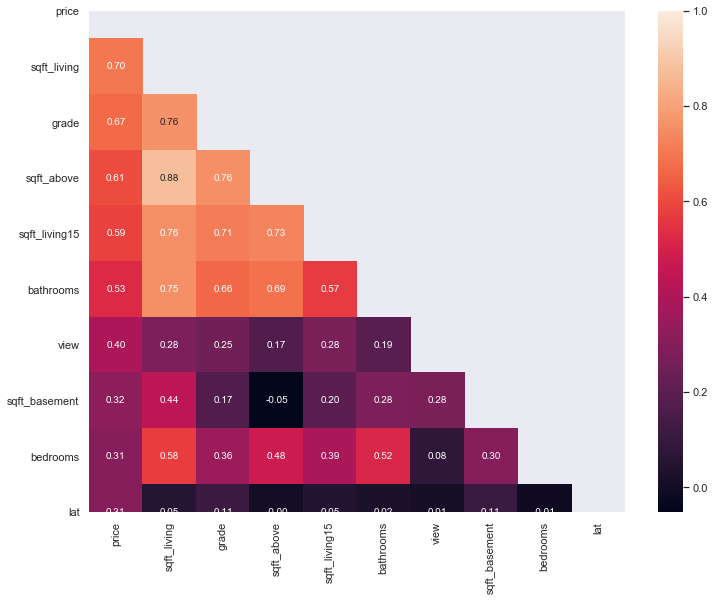

In [10]:
plt.figure(figsize=(12,8))
plt.subplots_adjust(bottom=0.01)
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df_corr, cbar=True, annot=True, fmt='.2f',mask=mask)

# Histogram of all features for small dataset

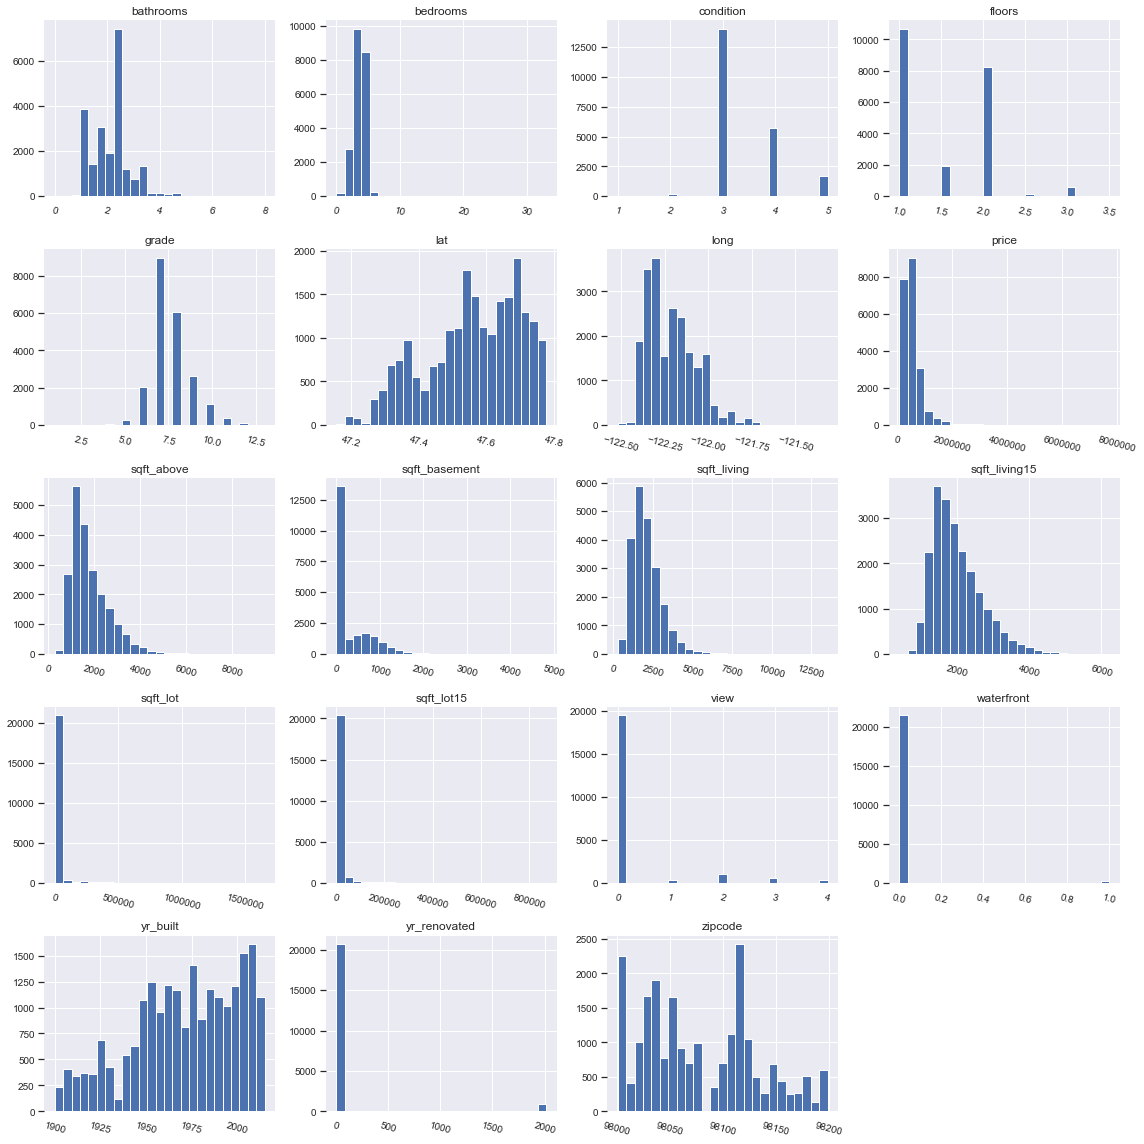

In [11]:
df1= df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
    'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
    'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
    'lat', 'long', 'sqft_living15', 'sqft_lot15']]

h = df1.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)

[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

plt.tight_layout()

# Univariate Analysis

## Discrete Variables

In [12]:
df.head(1)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sales,age,yr_renovated2,age_after_renovation,zipcode2,zipcode_houses,basement_bool,age_cat,age_after_renovation_cat,renovation_bool
0,2014-10-13,2.2e+05,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,48,-1.2e+02,1340,5650,2014,59,1955,59,others,262,0,5,5,0


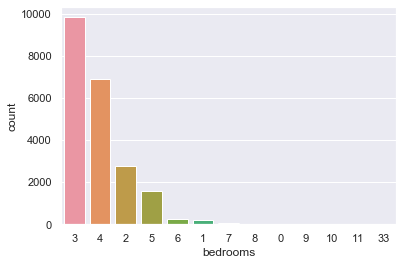

In [13]:
sns.countplot(df.bedrooms, order = df['bedrooms'].value_counts().index)

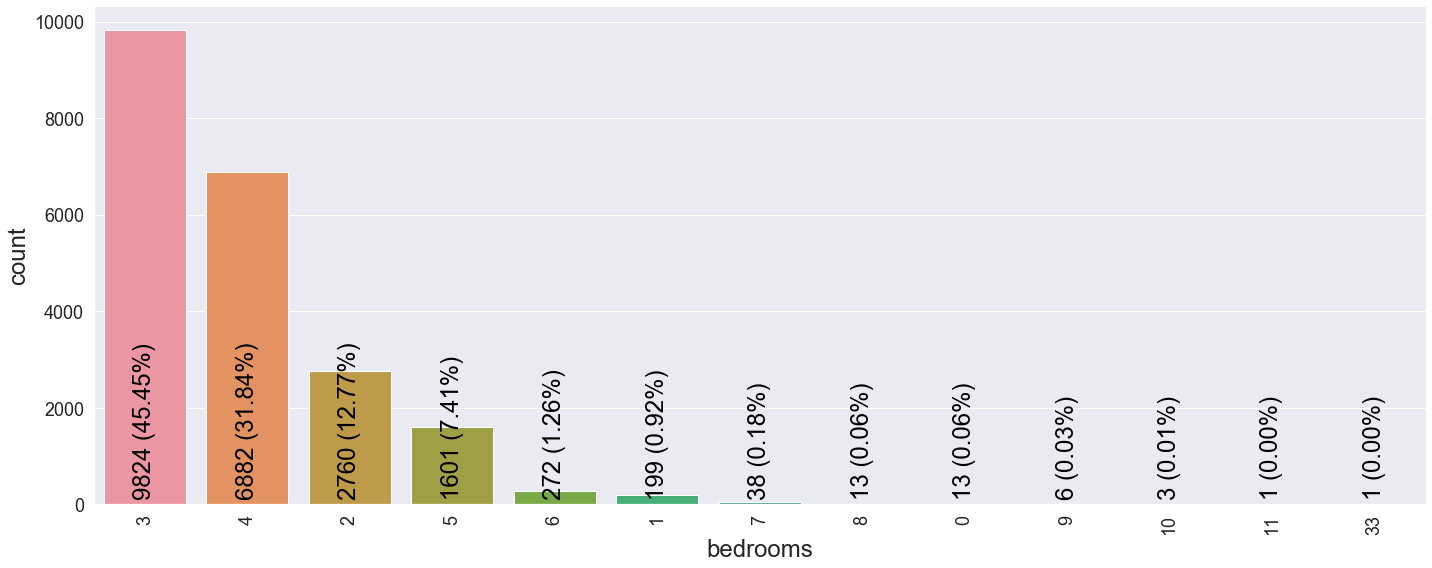

In [14]:
count_plot(df,'bedrooms',bottom=200)

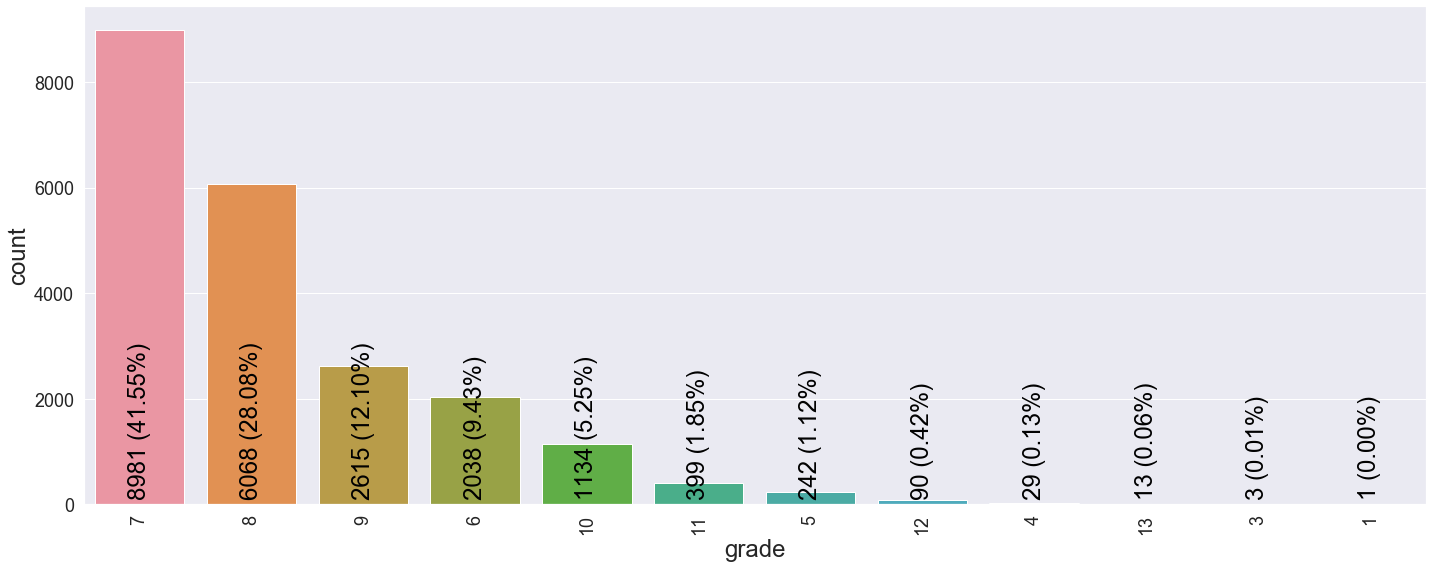

In [15]:
count_plot(df,'grade',bottom=200)

## Continuous variable

In [16]:
df['sqft_living'].describe()

count   2.2e+04
mean    2.1e+03
std     9.2e+02
min     2.9e+02
25%     1.4e+03
50%     1.9e+03
75%     2.6e+03
max     1.4e+04
Name: sqft_living, dtype: float64

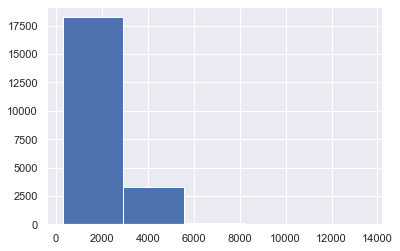

In [17]:
plt.hist('sqft_living', data = df, bins = 5);

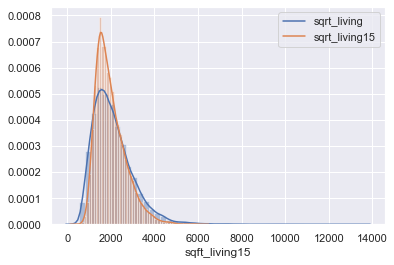

In [74]:
sns.distplot(df['sqft_living'], hist=True, kde=True, rug=False,
             norm_hist=True, kde_kws={"label": "sqrt_living"})

sns.distplot(df['sqft_living15'], hist=True, kde=True, rug=False,
              norm_hist=True,kde_kws={"label": "sqrt_living15"})

# Categorical variables

## waterfront

In [71]:
df['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

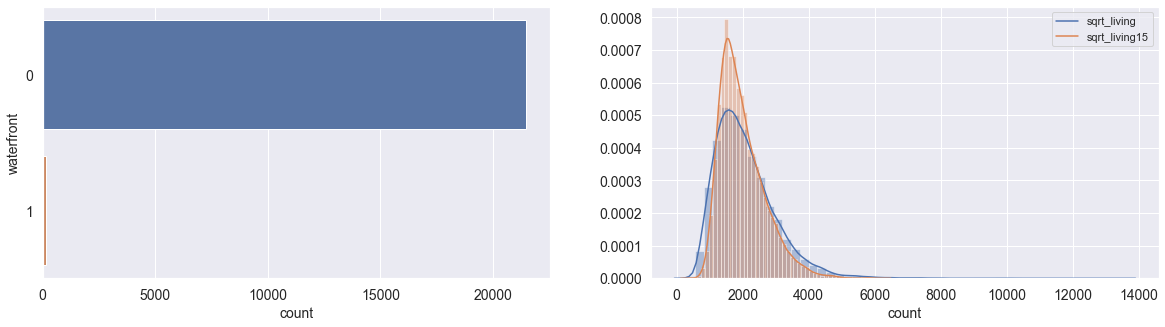

In [130]:
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
ax0= sns.countplot(y="waterfront", data=df)

# add another plot
plt.subplot(1, 2, 2)
sns.distplot(df['sqft_living'], hist=True, kde=True, rug=False,
             norm_hist=True, kde_kws={"label": "sqrt_living"})

ax1 = sns.distplot(df['sqft_living15'], hist=True, kde=True, rug=False,
              norm_hist=True,kde_kws={"label": "sqrt_living15"})

ax0.tick_params(axis='both', which='both', labelsize=14)
ax1.tick_params(axis='both', which='both', labelsize=14)

ax0.set_ylabel('waterfront',fontsize=14)
ax0.set_xlabel('count',fontsize=14)
ax1.set_ylabel('')
ax1.set_xlabel('count',fontsize=14)


# plt.tight_layout()
plt.show()

In [127]:
# [ i for i in dir(ax0) if i[:3]=='set']

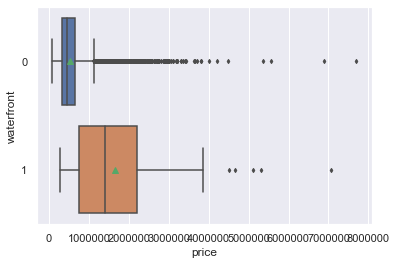

In [20]:
sns.boxplot(y = 'waterfront', x = 'price', data = df,width = 0.8,
            orient = 'h', showmeans = True, fliersize = 3)

In [21]:
# Calculate the correlation coefficient
r, p = stats.pointbiserialr(df['waterfront'], df['price'])
print ('point biserial correlation r is {:.2f} with p = {:.2f}'.format(r,p))

point biserial correlation r is 0.27 with p = 0.00


Observation
- Houses with no waterfront are less spread, their prices are similar.
- Houses with waterfront are widely spread, thier prices are diverse.
- Houses with waterfront have higher price (validated by +ve point-biserial coeff)
- There is little correlation between two waterfronts.
  
We have not tested the assumptions of point-biserial correlation
- There should be no significant outliers in the two groups of the
  dichotomous variable in terms of the continuous variable.
- There should be homogeneity of variances.
- The continuous variable should be approximately normally distributed
  for each group of the dichotomous variable.

## basement_bool

point biserial correlation r is 0.18 with p = 0.00


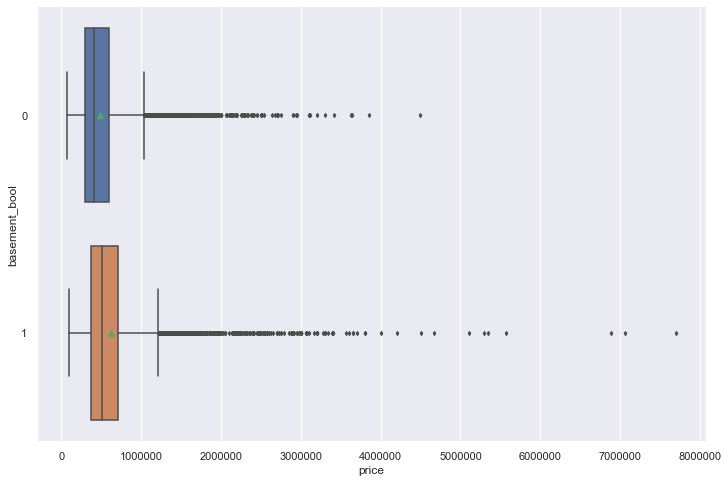

In [22]:
plt.figure(figsize=(12,8))
sns.boxplot(y = 'basement_bool', x = 'price', data = df,width = 0.8,
            orient = 'h', showmeans = True, fliersize = 3)

r, p = stats.pointbiserialr(df['basement_bool'], df['price'])
print ('point biserial correlation r is {:.2f} with p = {:.2f}'.format(r,p))

## renovation_bool

point biserial correlation r is 0.13 with p = 0.00


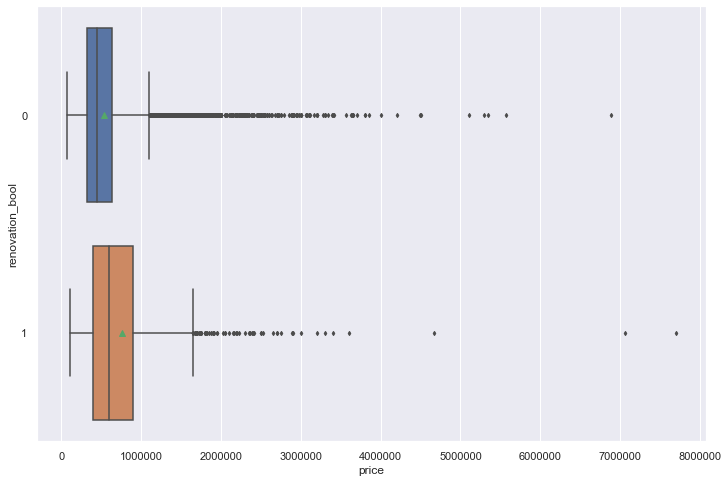

In [23]:
plt.figure(figsize=(12,8))
sns.boxplot(y = 'renovation_bool', x = 'price', data = df,width = 0.8,
            orient = 'h', showmeans = True, fliersize = 3)

r, p = stats.pointbiserialr(df['renovation_bool'], df['price'])
print ('point biserial correlation r is {:.2f} with p = {:.2f}'.format(r,p))

## box plots of categorical features

In [24]:
cols_cat = ['bedrooms' ,'bathrooms',
            'floors', 'view',
            'condition','grade']

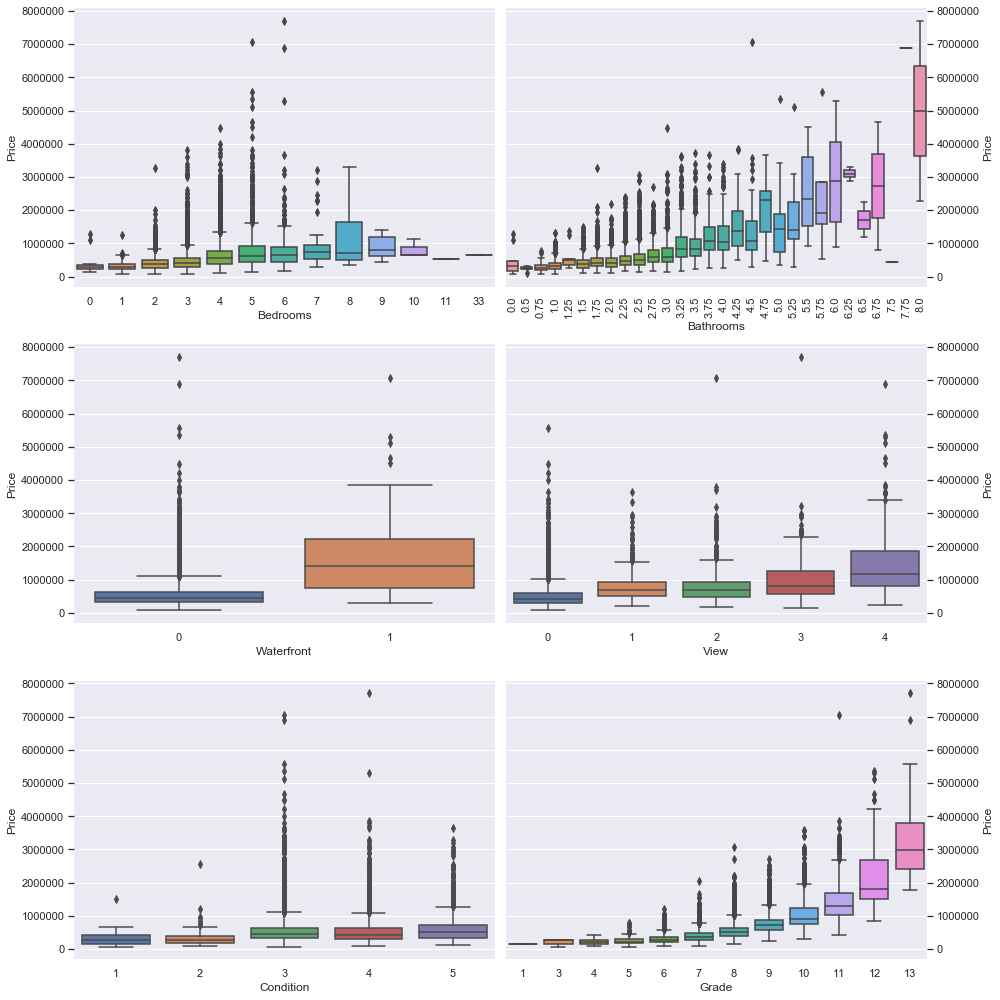

In [25]:
f, ax = plt.subplots(3, 2,figsize=(14,14))

sns.boxplot(x=df['bedrooms'],y=df['price'], ax=ax[0][0])
sns.boxplot(x=df['bathrooms'],y=df['price'], ax=ax[0][1])
sns.boxplot(x=df['waterfront'],y=df['price'], ax=ax[1][0])
sns.boxplot(x=df['view'],y=df['price'], ax=ax[1][1])
sns.boxplot(x=df['condition'],y=df['price'], ax=ax[2][0])
sns.boxplot(x=df['grade'],y=df['price'], ax=ax[2][1])


sns.despine(left=True, bottom=True)

ax[0][0].set(xlabel='Bedrooms', ylabel='Price')
ax[0][0].yaxis.tick_left()
ax[0][1].yaxis.set_label_position("right")

ax[0][1].yaxis.tick_right()
ax[0][1].set(xlabel='Bathrooms', ylabel='Price')
ax[0][1].set_xticklabels(ax[0][1].get_xticklabels(),rotation=90)

ax[1][0].set(xlabel='Waterfront', ylabel='Price')
ax[1][0].yaxis.tick_left()
ax[1][1].yaxis.set_label_position("right")
ax[1][1].yaxis.tick_right()
ax[1][1].set(xlabel='View', ylabel='Price')

ax[2][0].set(xlabel='Condition', ylabel='Price')
ax[2][0].yaxis.tick_left()
ax[2][1].yaxis.set_label_position("right")
ax[2][1].yaxis.tick_right()
ax[2][1].set(xlabel='Grade', ylabel='Price')

plt.tight_layout()


In [26]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'yr_sales', 'age', 'yr_renovated2',
       'age_after_renovation', 'zipcode2', 'zipcode_houses', 'basement_bool',
       'age_cat', 'age_after_renovation_cat', 'renovation_bool'],
      dtype='object')

In [27]:
stats.spearmanr(df['bedrooms'],df['price'])

SpearmanrResult(correlation=0.34465237095978885, pvalue=0.0)

In [28]:
stats.spearmanr(df['floors'],df['price'])

SpearmanrResult(correlation=0.32234655003563695, pvalue=0.0)

In [29]:
(df[['bedrooms','floors','view','condition','grade']]
 .corrwith(df['price'],method='spearman')
 .rename('spearmanr').rename_axis('column').reset_index())

,column,spearmanr
0,bedrooms,0.34
1,floors,0.32
2,view,0.29
3,condition,0.018
4,grade,0.66


# Bi-variate Analysis

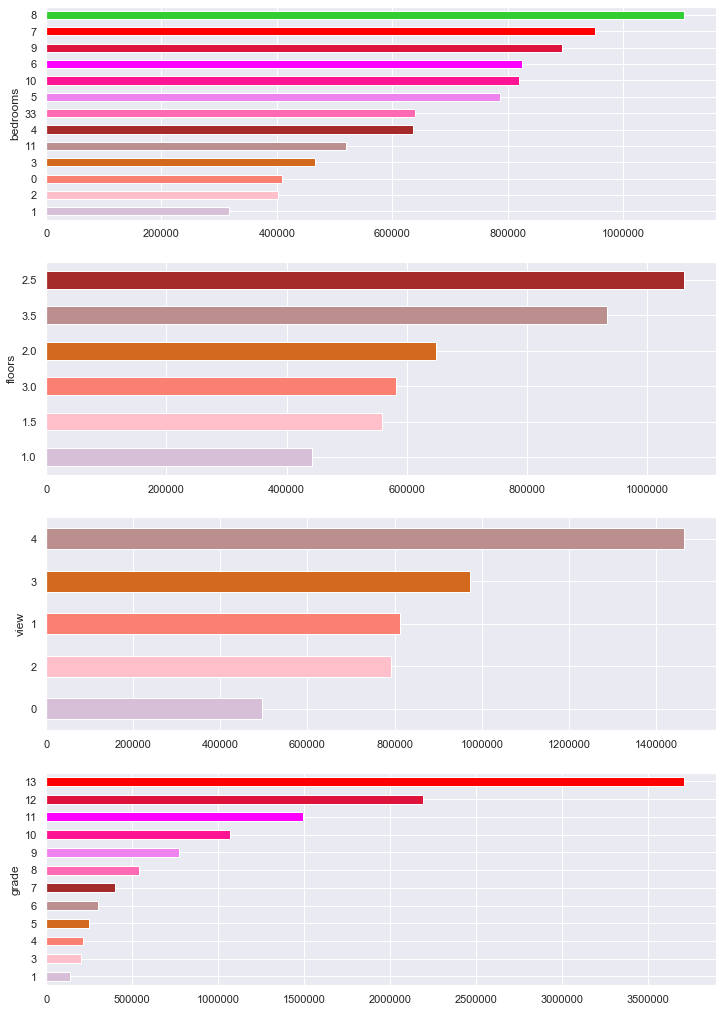

In [64]:
fig,ax= plt.subplots(4,1, figsize=(12,18))
df.groupby(['bedrooms'])['price'].mean().sort_values().plot.barh(color=colors,ax=ax[0])
df.groupby(['floors'])['price'].mean().sort_values().plot.barh(color=colors,ax=ax[1])
df.groupby(['view'])['price'].mean().sort_values().plot.barh(color=colors,ax=ax[2])
df.groupby(['grade'])['price'].mean().sort_values().plot.barh(color=colors,ax=ax[3]) 

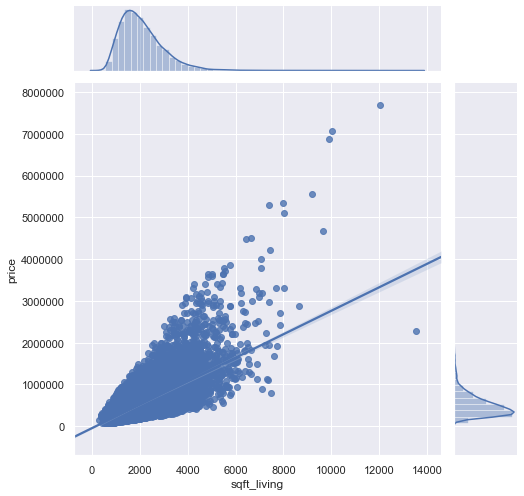

In [31]:
sns.jointplot(x="sqft_living", y="price", data=df, kind = 'reg', height = 7)

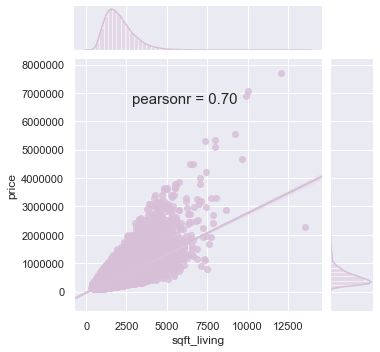

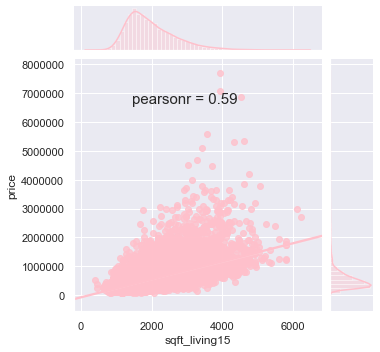

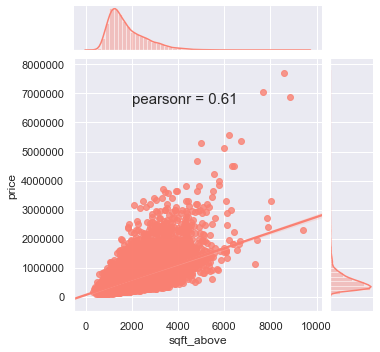

In [32]:
from src.util.util_viz import colors


def multiple_jointplots_with_pearsonr(cols,target):
    import scipy
    for i,col in enumerate(cols):
        p = sns.jointplot(x=col, y=target, data=df, kind = 'reg', height = 5 ,color=colors[i])
        r, _ = scipy.stats.pearsonr(df[col].values, df[target].values)
        p.fig.text(0.3, 0.7, "pearsonr = {:.2f}".format(r), ha ='left', fontsize = 15)

cols = ['sqft_living', 'sqft_living15', 'sqft_above']
multiple_jointplots_with_pearsonr(cols,'price')

Observation:
- sqft_living, sqft_above and sqft_living15 all are strongly correlated with
  price.
- Let's look their correlation among themselves.

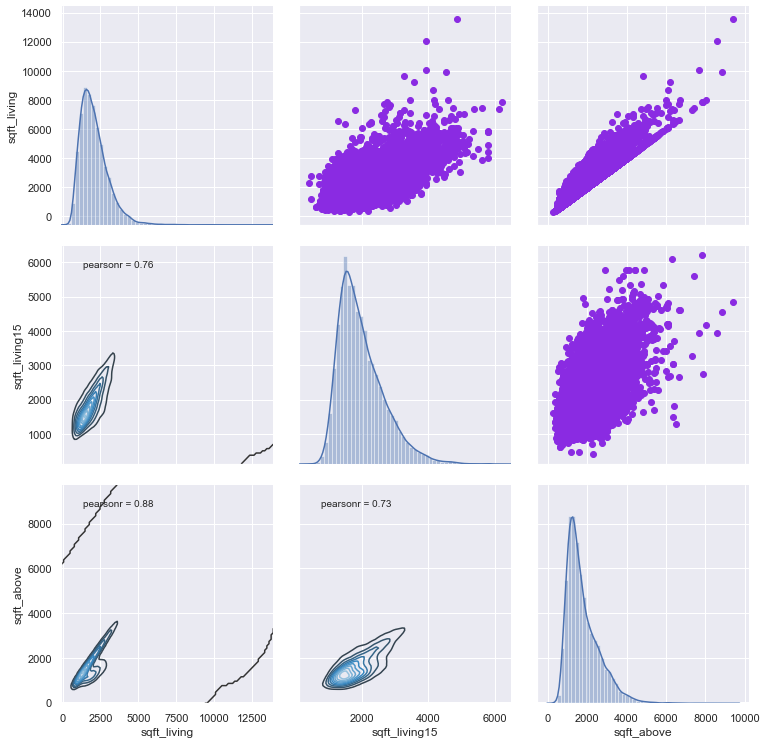

In [33]:
from src.util.util_viz import corrplot_with_pearsonr
    
cols = ['sqft_living', 'sqft_living15', 'sqft_above']    
corrplot_with_pearsonr(df,cols)

Observation
- There is strong relationship among 3 variables (r>0.7).
- sqft_above = sqft_livng - sqft_basement.
- sqft_living15 is strongly related to price.
- sqft_living15 is strongly related to sqft_above.
- We do not know sqft_living15 is partially correlated with price or not.

In [34]:
from src.util.util_stats import partial_corr

cols = ['price', 'sqft_living', 'sqft_living15']
partial_corr(df,cols)

,price,sqft_living,sqft_living15
price,1,0.48,0.063
sqft_living,0.48,1,0.78
sqft_living15,0.063,0.78,1


In [35]:
df[cols].corr(method='pearson') # full correlations.

,price,sqft_living,sqft_living15
price,1,0.7,0.59
sqft_living,0.7,1,0.76
sqft_living15,0.59,0.76,1


In [36]:
stats.pearsonr(df['sqft_living'], df['price'])

(0.7020350546118002, 0.0)

In [37]:
stats.pearsonr(df['sqft_living15'], df['price'])

(0.585378903579568, 0.0)

Observation
- Now we can see that sqft_living15 has almost no correlation with house price.
- This means average house size of surrounding houses has no effect on the sell price.

# Multi-variate Analysis

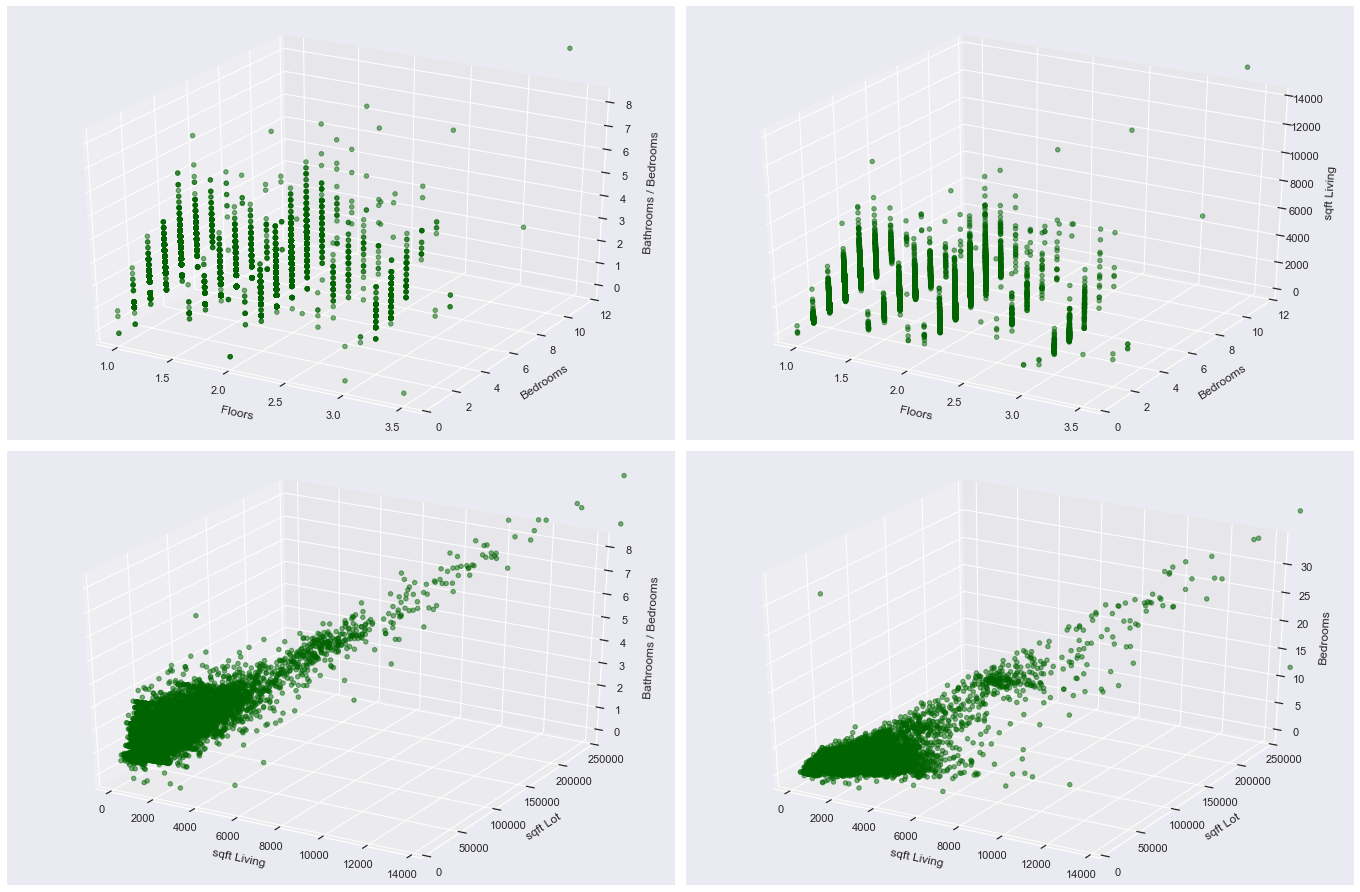

In [38]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(19,12.5))
ax=fig.add_subplot(2,2,1, projection="3d")
ax.scatter(df['floors'],df['bedrooms'],df['bathrooms'],c="darkgreen",alpha=.5)
ax.set(xlabel='\nFloors',ylabel='\nBedrooms',zlabel='\nBathrooms / Bedrooms')
ax.set(ylim=[0,12])

ax=fig.add_subplot(2,2,2, projection="3d")
ax.scatter(df['floors'],df['bedrooms'],df['sqft_living'],c="darkgreen",alpha=.5)
ax.set(xlabel='\nFloors',ylabel='\nBedrooms',zlabel='\nsqft Living')
ax.set(ylim=[0,12])

ax=fig.add_subplot(2,2,3, projection="3d")
ax.scatter(df['sqft_living'],df['sqft_lot'],df['bathrooms'],c="darkgreen",alpha=.5)
ax.set(xlabel='\n sqft Living',ylabel='\nsqft Lot',zlabel='\nBathrooms / Bedrooms')
ax.set(ylim=[0,250000])

ax=fig.add_subplot(2,2,4, projection="3d")
ax.scatter(df['sqft_living'],df['sqft_lot'],df['bedrooms'],c="darkgreen",alpha=.5)
ax.set(xlabel='\n sqft Living',ylabel='\nsqft Lot',zlabel='Bedrooms')
ax.set(ylim=[0,250000])

plt.tight_layout()
plt.show()

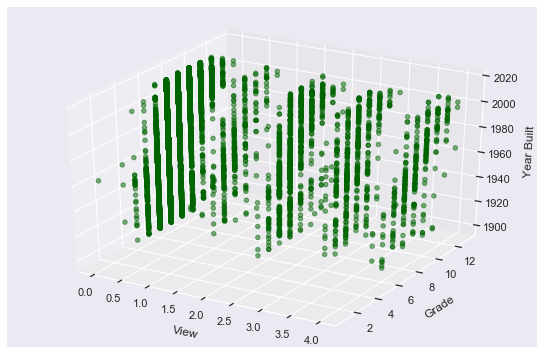

In [39]:
fig=plt.figure(figsize=(9.5,6.25))
ax=fig.add_subplot(1,1,1, projection="3d")
ax.scatter(df['view'],df['grade'],df['yr_built'],c="darkgreen",alpha=.5)
ax.set(xlabel='\nView',ylabel='\nGrade',zlabel='\nYear Built');

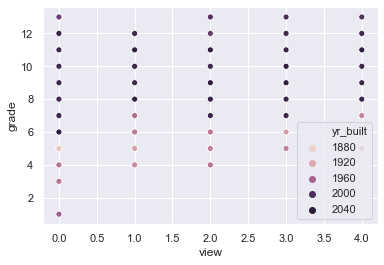

In [40]:
sns.scatterplot(x='view',y='grade',data=df,hue='yr_built')